In [6]:
from itertools import combinations 

from Bio import Medline
import networkx as nx
from networkx.readwrite import json_graph


In [33]:
# parsing a medline file 
def parse_medline(medline_file):    
    list_of_abstracts = []    
    pmid = ''
    abstract = ''  
    with open(medline_file) as medline_handle:
        records = Medline.parse(medline_handle)
        for record in records:         
            keys = record.keys()            
            if 'PMID' in keys and 'AB' in keys: 

                pmid = record['PMID']
                abstract = record['AB']

                pair = (pmid, abstract)
                list_of_abstracts.append(pair)
    return list_of_abstracts

In [188]:
list_of_abstracts = parse_medline('pubmed-20210601Da-set-mk4482.txt')

In [189]:
len(list_of_abstracts)
# list_of_abstracts[10]
# len(list_of_abstracts)

9997

In [35]:
# for abst in list_of_abstracts:
#     print(abst)
#     print("----------")
    


In [38]:
import networkx as nx
import obonet

In [39]:
def load_obo_ontology(obo_file):    
    chebi_id_name = {}    
#     url = obo_file
    graph = obonet.read_obo(obo_file)    
    for key, item in graph.nodes(data=True):
        chebi_id_name[key] = item['name'].strip(',').strip('\n').strip('.').strip('(').strip(')').lower()
    
    return chebi_id_name


In [48]:
chebi_key_value = load_obo_ontology('chebi.obo')

In [190]:
chebi_key_value['CHEBI:180653']

'molnupiravir'

In [54]:
def extract_entity_chebi_names(chebi_key_value):
    chebi_term_names = []
    for key in chebi_key_value.keys():
        chebi_term = chebi_key_value[key]
        chebi_term_names.append(chebi_term.lower())
    return chebi_term_names    

In [55]:
chebi_term_names = extract_entity_chebi_names(chebi_key_value)

In [56]:
chebi_term_names[10]

'sodium fluoride'

In [10]:
# def load_hamed_30(covidx_file):
#     top_30 = []
#     file_handle = open(covidx_file)
#     hamed_onto = file_handle.readlines()    
#     for term in hamed_onto:
#         top_30.append(term.rstrip('\n').lower())
#     return top_30

In [11]:
# hamed_onology = load_hamed_30('covidx_30.txt')
# hamed_onology[0]

'acyclovir'

In [12]:
# def foundin_hamed30_count(abstract_chebi_terms, hamed30_drugs):
#     count = 0
#     for chebi_term in abstract_chebi_terms:        
# #         print('chebi term read:', chebi_term)
#         if chebi_term in hamed30_drugs:
#             count += 1
#     return  count

In [191]:
sample = list_of_abstracts
abs_counter = 0
base_association_analysis = []

exclude_list = ['role', 'drug', 'acid', 'application', 'solution', 'molecule', 'pharmaceutical', 'inhibitor', 'protein', 'food', 'group']
criteria_meeting_dictionary = {}


for article in sample:
    abs_counter += 1
    print('Reading PMID: ',  article[0], ' number: ', abs_counter)
    chebi_list_items = []
    qualified_list_items = []
    
    abstract = article[1].lower()
    
    
    for word in abstract.split():

        clean_word = word.strip(',').strip('\n').strip('.').strip('(').strip(')').lower()
        for key, value in chebi_key_value.items():
            if clean_word == value and clean_word not in exclude_list:
                qualified_obo_item = key.replace(':', '') + '_' + clean_word
                obo_item = clean_word
#                 if qualified_obo_item not in qualified_list_items:
#                     qualified_list_items.append(qualified_obo_item)

                if obo_item not in chebi_list_items:
                    chebi_list_items.append(obo_item)

    if len(chebi_list_items) > 1  : 
        print('Analyzing article ...')
        print(chebi_list_items)
        criteria_meeting_dictionary[article[0]] = chebi_list_items
        base_association_analysis.append(chebi_list_items)
        print('\n\n-----------------------------------------------------------')    
        
        
        

Reading PMID:  33347790  number:  1
Reading PMID:  33338197  number:  2
Reading PMID:  33666147  number:  3
Reading PMID:  32985113  number:  4
Analyzing article ...
['gs-441524', 'remdesivir']


-----------------------------------------------------------
Reading PMID:  34389034  number:  5
Reading PMID:  33399028  number:  6
Reading PMID:  33813796  number:  7
Reading PMID:  33723809  number:  8
Reading PMID:  33128861  number:  9
Reading PMID:  33989635  number:  10
Analyzing article ...
['molnupiravir', 'prodrug', 'nucleoside', 'gtp', 'atp', 'utp', 'ctp', 'base', 'nucleotide']


-----------------------------------------------------------
Reading PMID:  33714096  number:  11
Analyzing article ...
['polymer', 'glass']


-----------------------------------------------------------
Reading PMID:  34145263  number:  12
Reading PMID:  34619630  number:  13
Reading PMID:  34860154  number:  14
Reading PMID:  34696406  number:  15
Reading PMID:  34147139  number:  16
Reading PMID:  32845869 

In [192]:
file = open("use-cases.mk-pf.results.02022022.txt", "a")

for key in criteria_meeting_dictionary:
    file.write(key)
    file.write("|")
    for drug in criteria_meeting_dictionary[key]:
        file.write(drug)
        file.write(',')
    file.write('\n')
file.close()
    
    
    

In [210]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(base_association_analysis).transform(base_association_analysis)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [211]:
df

,-)-epicatechin-3-o-gallate,"1,3,4-oxadiazoles",10-hydroxyusambarensine,2-deoxy-d-glucose,25-hydroxycholesterol,7-acetoxy-2-methylisoflavone,acarbose,acceptor,acenocoumarol,acetaldehyde,...,vitexin,vorinostat,water,withanolide,wogonin,wortmannin,xylitol,zafirlukast,zeolite,zidovudine
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
902,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [213]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.000001)

,support,itemsets
0,0.001104,(0)
1,0.001104,(1)
2,0.001104,(2)
3,0.001104,(3)
4,0.001104,(4)
...,...,...
41860,0.001104,"(354, 363, 588, 430, 463, 381, 83, 150, 602, 6..."
41861,0.001104,"(354, 363, 588, 430, 463, 381, 93, 150, 602, 6..."
41862,0.001104,"(353, 195, 291, 708, 102, 201, 620, 692, 602, ..."
41863,0.001104,"(352, 384, 162, 444, 452, 504, 270, 436, 570, ..."


In [214]:
frequent_itemsets = apriori(df, min_support=0.000001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [215]:
len(frequent_itemsets)

41865

In [198]:
frequent_itemsets

,support,itemsets,length
0,0.006623,(adenosine),1
1,0.014349,(adjuvant),1
2,0.007726,(agonist),1
3,0.020971,(alanine),1
4,0.017660,(alcohol),1
...,...,...,...
168,0.011038,"(lopinavir, ritonavir)",2
169,0.005519,"(nucleoside, remdesivir)",2
170,0.007726,"(chloroquine, hydroxychloroquine, remdesivir)",3
171,0.005519,"(sulfate, heparan, heparin)",3


In [216]:
def combinantorial(lst):
    count = 0
    index = 1
    pairs = []
    for element1 in lst:
        for element2 in lst[index:]:
            pairs.append((element1, element2))
        index += 1
    return pairs

In [217]:
list_of_lists = []
for item in frequent_itemsets['itemsets']:
    if len(item) > 1:
        list_of_lists.append(list(item))

In [218]:
import networkx as nx
import matplotlib.pyplot as plt

In [219]:
drug_association_network = nx.Graph()

In [220]:
for my_list in list_of_lists:
    pairs = combinantorial(my_list)
    drug_association_network.add_edges_from(pairs)
print(nx.info(drug_association_network))

Name: 
Type: Graph
Number of nodes: 717
Number of edges: 3019
Average degree:   8.4212


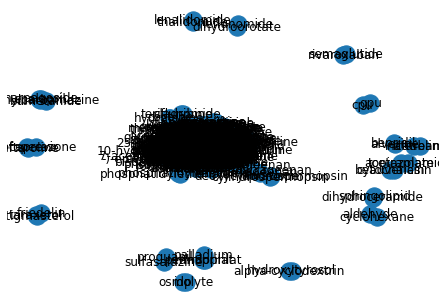

In [221]:
nx.draw(drug_association_network, with_labels=True)
nodes = drug_association_network.nodes()


In [222]:
import math

In [223]:
lists_to_remove = ['label',  
                   'base', 'cluster', 
                   'ion', 'djuvant', 'oxide']
drug_association_network.remove_nodes_from(lists_to_remove)

In [237]:
# for node in drug_association_network.nodes:

#     if node.startswith("nir"):
#         print(node)        

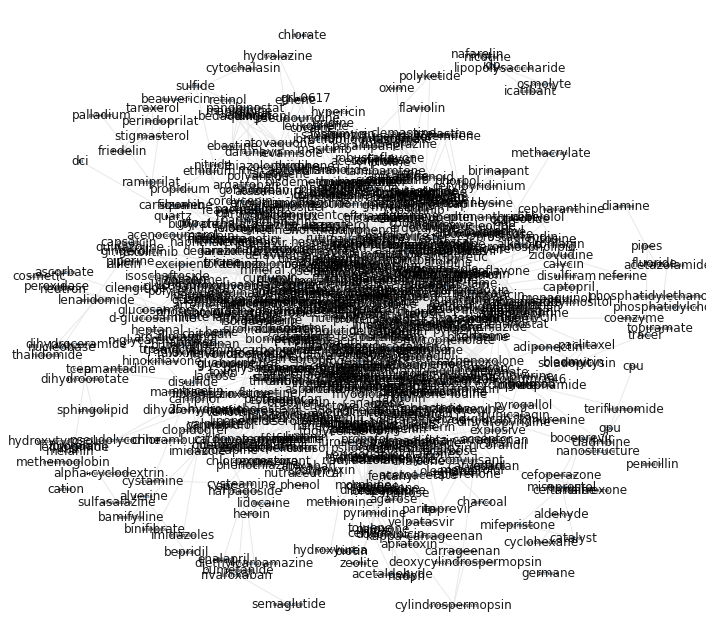

In [265]:
lists_to_remove = ['label',  
                   'base', 'cluster', 'home', 'pf-07321332', 'pf-07304814', 'water', 'lipid', 'nucleoside', 'ammonium',
                   'ion', 'djuvant', 'oxide', 'gs-441524', 'gtp', 'ctp', 'utp', 'atp', 'donor', 'electron', 'nac', 'radical']
drug_association_network.remove_nodes_from(lists_to_remove)

# G = nx.wheel_graph(25)
plt.figure(figsize=(10,9))
pos = nx.spring_layout(drug_association_network, k=5/math.sqrt(drug_association_network.order()))
# nx.draw(drug_association_network)
nx.draw_networkx(drug_association_network, pos, alpha=.9, edge_color='.9', node_size=.5)

nx.draw_networkx_labels(drug_association_network, pos, font_size=5, font_color='k'
                       , font_family='sans-serif', font_weight='normal')

plt.axis('off')
plt.tight_layout();




In [238]:
# ct-cliques_5_text.txt

def write_clique_to_file(clique_list, file_to_write):
    f_handle = open(file_to_write, 'a')
    for item in clique_list:
        f_handle.write(item)
        f_handle.write('|')
    f_handle.write('\n')

In [247]:
cliques = nx.find_cliques(drug_association_network)

In [248]:
for c_clique in cliques:    
    if len(list(c_clique)) == 4:
        print(c_clique)
        write_clique_to_file(c_clique, '/Users/ahamed/Teaching/CS305A-SP21/clique-comp-algorithm/pf-mk/cliques-4_hamed.txt') 

['defensin', 'peptide', 'cysteine', 'adjuvant']
['ribose', 'ligand', 'coumarin', 'adp']
['ribose', 'ligand', 'nucleotide', 'alcohol']
['triglyceride', 'cholesterol', 'alanine', 'lipoprotein']
['nanotube', 'antigen', 'buffer', 'ester']
['reagent', 'glycol', 'ethidium', 'propidium']
['leupeptin', 'nelfinavir', 'birinapant', 'octreotide']
['ciclesonide', 'antipyretic', 'levofloxacin', 'azithromycin']
['ciclesonide', 'azide', 'metabolite', 'corticosteroid']
['ciclesonide', 'dexamethasone', 'corticosteroid', 'prednisolone']
['ciclesonide', 'dexamethasone', 'corticosteroid', 'azithromycin']
['ciclesonide', 'dexamethasone', 'favipiravir', 'azithromycin']
['creatine', 'furosemide', 'myoglobin', 'creatinine']
['testosterone', 'androgen', 'glucose', 'hormone']
['testosterone', 'angiotensin', 'dexamethasone', 'creatinine']
['opine', 'm1', 'm2', 'antioxidant']
['n-oxide', 'pyridine', 'hydroxychloroquine', 'chloroquine']
['biomarker', 'peptide', 'glycopeptide', 'glycan']
['biomarker', 'peptide', 'g

In [121]:

# [(items[i],items[j]) for i in range(len(items)) for j in range(i+1, len(items))]